In [1]:
!pip install seaborn

In [2]:
!pip install psycopg2-binary

  Using cached psycopg2_binary-2.9.10-cp312-cp312-macosx_14_0_arm64.whl.metadata (4.9 kB)
Using cached psycopg2_binary-2.9.10-cp312-cp312-macosx_14_0_arm64.whl (3.3 MB)


Importing Libraries and Loading Data

In [3]:
import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# The dataset has already been generated and saved as 'simulated_port_data.csv'
df = pd.read_csv("simulated_port_data.csv")

# Convert arrival_date to datetime format
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'])
df.head()


,Shipment_ID,Arrival_Date,Departure_Date,Cargo_Type,Shipping_Company,Port_of_Origin,Port_of_Destination,Tonnage,Delay_Days
0,SHIP_0001,2024-10-27,2024-10-30,Vehicles,Maersk,Antwerp,Rotterdam,270.05,6
1,SHIP_0002,2024-10-27,2024-10-31,General Cargo,Hapag-Lloyd,Shanghai,Shanghai,4695.72,2
2,SHIP_0003,2024-08-21,2024-09-04,Liquid Bulk,Evergreen,Singapore,Los Angeles,3998.23,10
3,SHIP_0004,2024-04-05,2024-04-07,Vehicles,MSC,Shanghai,Rotterdam,4418.80,6
4,SHIP_0005,2024-05-16,2024-05-17,Containers,Evergreen,Tokyo,Dubai,1683.46,1


Connecting Pyhton to PostgreSQL and Loading Data

In [4]:
import pandas as pd
from sqlalchemy import create_engine

# Database connection details
dbname = "port_data"
user = "postgres"
password = "20022020"  # Place your PostgreSQL password
host = "localhost"
port = "5432"

# Create the database connection
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{dbname}')

# Load the data from PostgreSQL into a pandas DataFrame
df = pd.read_sql("SELECT * FROM shipments", engine)

# Show the first few rows of the dataframe
print(df.head())

  shipment_id arrival_date departure_date     cargo_type shipping_company  \
0   SHIP_0001   2024-02-23     2024-03-04    Liquid Bulk           Maersk   
1   SHIP_0002   2024-12-09     2024-12-10       Vehicles              ONE   
2   SHIP_0003   2024-05-22     2024-05-23       Vehicles        Evergreen   
3   SHIP_0004   2024-10-19     2024-10-23  General Cargo           Maersk   
4   SHIP_0005   2024-08-22     2024-08-28     Solid Bulk            COSCO   

  port_of_origin port_of_destination  tonnage  delay_days  
0      Singapore         Los Angeles  2764.43           2  
1          Tokyo               Dubai  3165.23           9  
2       New York           Rotterdam   326.05           2  
3          Tokyo           Singapore  4391.40           6  
4      Rotterdam         Los Angeles  3791.18           8  


Descriptive Statistics: this will provide key statistics, such as mean, standard deviation, min, max, values for tonnage and delay_days

In [5]:
# Get descriptive statistics of the numeric columns (tonnage, delay_days)
print(df.describe())


          tonnage  delay_days
count   100.00000  100.000000
mean   2655.58710    3.590000
std    1460.07955    3.728392
min     127.74000   -2.000000
25%    1351.66750    0.000000
50%    2834.36000    4.000000
75%    3899.26000    6.000000
max    4980.96000   10.000000


Average Tonnage and Delay Days

In [6]:
# Calculate average tonnage and delay days #Provides Average tonnage and Delay days
avg_tonnage = df['tonnage'].mean()
avg_delay_days = df['delay_days'].mean()

print(f"Average Tonnage: {avg_tonnage}")
print(f"Average Delay Days: {avg_delay_days}")


Average Tonnage: 2655.5870999999997
Average Delay Days: 3.59


Shipments by Cargo Type

In [7]:
# Group by cargo type and calculate total tonnage per type  #Provides Shipments by Cargo Type
cargo_summary = df.groupby('cargo_type')['tonnage'].sum().sort_values(ascending=False)
print(cargo_summary)

cargo_type
General Cargo    71548.16
Containers       56270.80
Solid Bulk       55090.66
Vehicles         45846.65
Liquid Bulk      36802.44
Name: tonnage, dtype: float64


Shipments with Delays

In [8]:
# Find shipments with delays #Provides Top 5 Shipments with Delays
delayed_shipments = df[df['delay_days'] > 0]
print(delayed_shipments[['shipment_id', 'arrival_date', 'departure_date', 'delay_days']].head())

  shipment_id arrival_date departure_date  delay_days
0   SHIP_0001   2024-02-23     2024-03-04           2
1   SHIP_0002   2024-12-09     2024-12-10           9
2   SHIP_0003   2024-05-22     2024-05-23           2
3   SHIP_0004   2024-10-19     2024-10-23           6
4   SHIP_0005   2024-08-22     2024-08-28           8


Data Visualization with Matpllotlib

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Database connection details
dbname = "port_data"  # database name
user = "postgres"     # PostgreSQL username
password = "20022020"  # PostgreSQL password
host = "localhost"    # Host where PostgreSQL is running
port = "5432"         # Default PostgreSQL port

# Create the database connection
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{dbname}')

# Load the data from PostgreSQL into a pandas DataFrame
df = pd.read_sql("SELECT * FROM shipments", engine)

# Verify that the data is loaded
print(df.head()) 

  shipment_id arrival_date departure_date     cargo_type shipping_company  \
0   SHIP_0001   2024-02-23     2024-03-04    Liquid Bulk           Maersk   
1   SHIP_0002   2024-12-09     2024-12-10       Vehicles              ONE   
2   SHIP_0003   2024-05-22     2024-05-23       Vehicles        Evergreen   
3   SHIP_0004   2024-10-19     2024-10-23  General Cargo           Maersk   
4   SHIP_0005   2024-08-22     2024-08-28     Solid Bulk            COSCO   

  port_of_origin port_of_destination  tonnage  delay_days  
0      Singapore         Los Angeles  2764.43           2  
1          Tokyo               Dubai  3165.23           9  
2       New York           Rotterdam   326.05           2  
3          Tokyo           Singapore  4391.40           6  
4      Rotterdam         Los Angeles  3791.18           8  


1. Shipments by Cargo Type (Bar Plot)

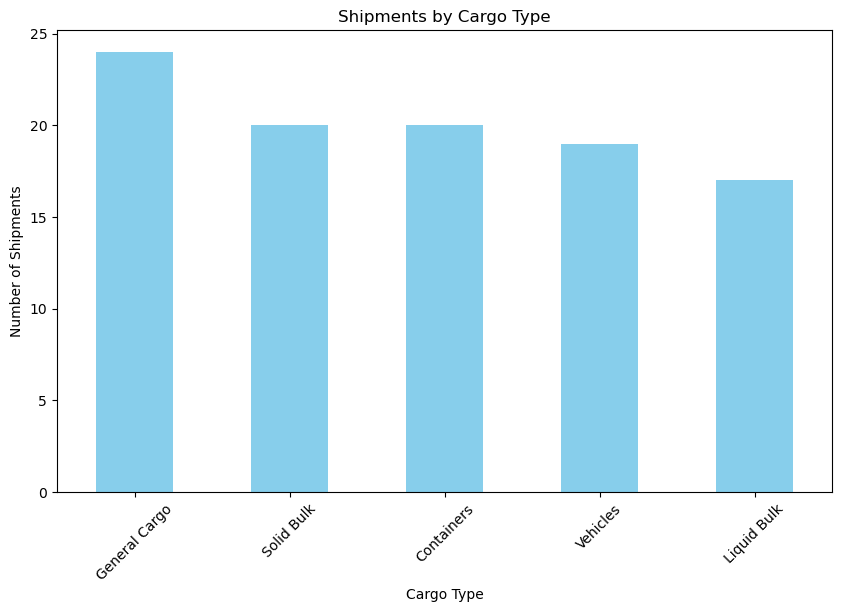

In [10]:
#Shipments by Cargo Type
import matplotlib.pyplot as plt

# Create a bar plot for shipments by cargo type
cargo_counts = df['cargo_type'].value_counts()

plt.figure(figsize=(10,6))
cargo_counts.plot(kind='bar', color='skyblue')
plt.title("Shipments by Cargo Type")
plt.xlabel("Cargo Type")
plt.ylabel("Number of Shipments")
plt.xticks(rotation=45)
plt.show()

2. Average Delay by Shipping Company (Bar Plot)

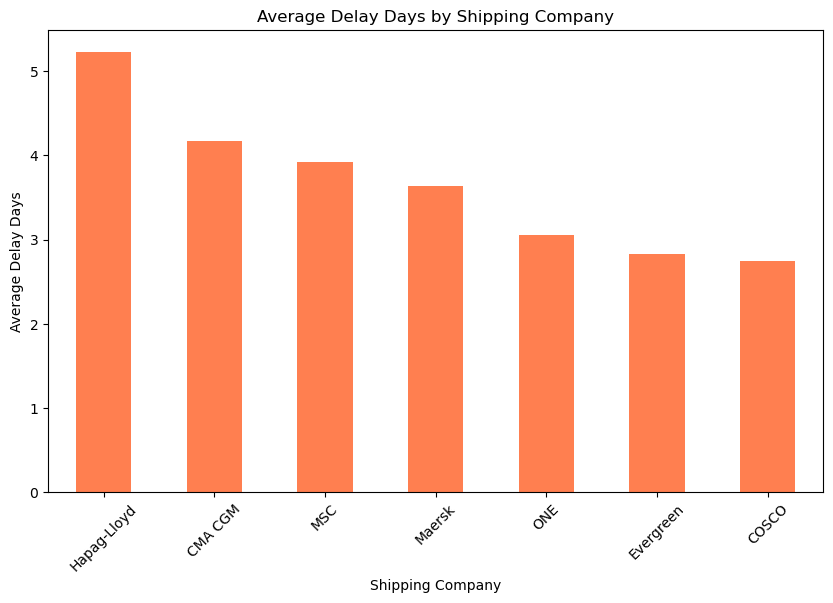

In [11]:
#Average Delay by Shipping Company
#----> Calculate average delay days per shipping company
avg_delay_by_company = df.groupby('shipping_company')['delay_days'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_delay_by_company.plot(kind='bar', color='coral')
plt.title("Average Delay Days by Shipping Company")
plt.xlabel("Shipping Company")
plt.ylabel("Average Delay Days")
plt.xticks(rotation=45)
plt.show()

3. Finding Trends

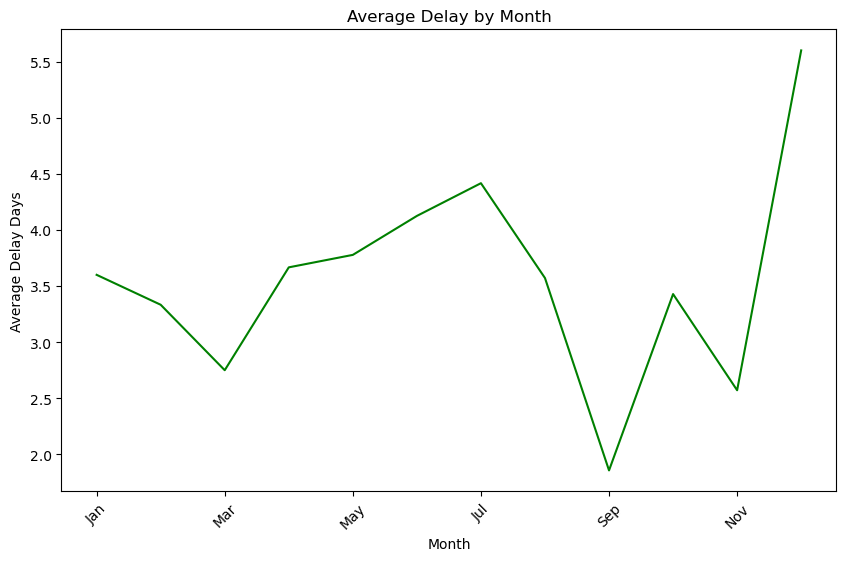

In [12]:
# Analysis of Avergae Delays over month
# Convert arrival_date to datetime format
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

# Extract month and year from arrival_date, then format to only show month
df['arrival_month'] = df['arrival_date'].dt.strftime('%b')  # Use '%b' for abbreviated month name

# Group by formatted month and calculate average delay
monthly_delay = df.groupby('arrival_month')['delay_days'].mean()

# Reorder months for plotting (so they appear in order from Jan to Dec)
monthly_delay = monthly_delay.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.figure(figsize=(10,6))
monthly_delay.plot(kind='line', color='green')
plt.title("Average Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay Days")
plt.xticks(rotation=45)
plt.show()

Advanced Analysis

1. Shipments Over Time: Analysing the trend of shipments per month and the average delay per month to spot any seasonality or trend.
Shipments Over Time - The spike in the number of shipments during certain month might indicate seasonal trends (e.g., holidays, harvests, or trade seasons) or busy periods 
Average Delay - A rising average delay could indicate growing inefficiencies or disruptions in operations over time, it suggests logistical issues or congestion at the port.

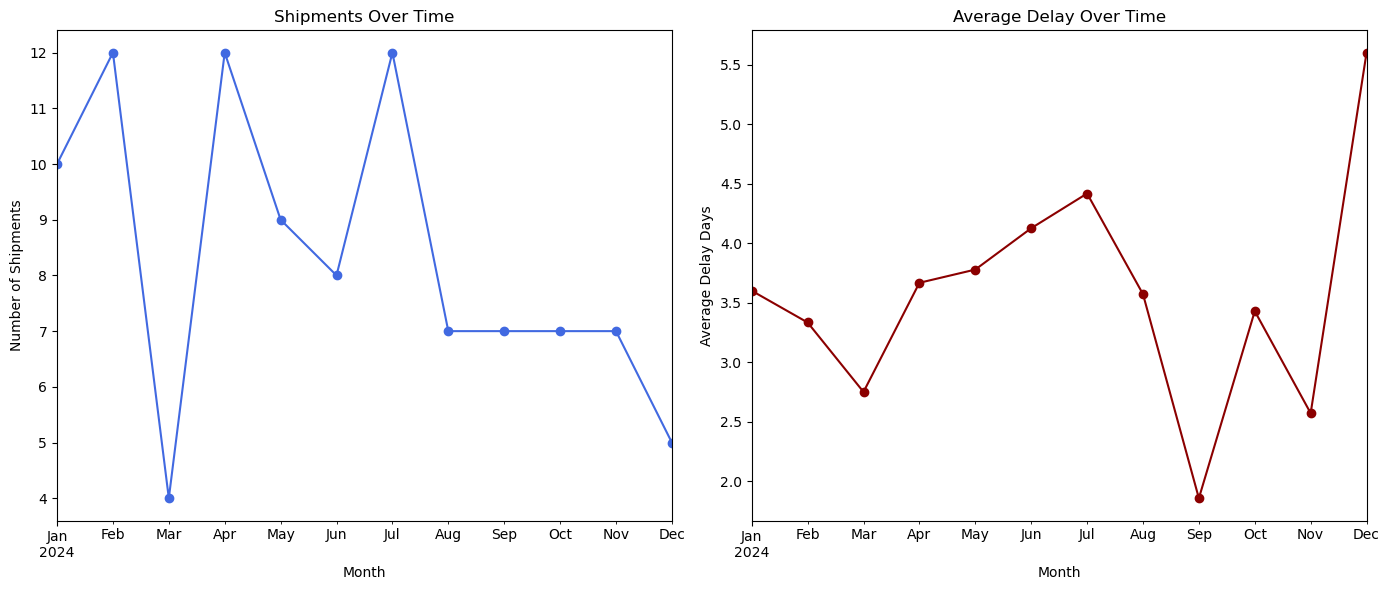

In [13]:
import matplotlib.pyplot as plt

# Convert arrival_date to datetime format (if not already)
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

# Extract month and year from arrival_date
df['arrival_month'] = df['arrival_date'].dt.to_period('M')

# Group by arrival_month to get total shipments per month
monthly_shipments = df.groupby('arrival_month').size()

# Group by arrival_month to get average delay days per month
monthly_avg_delay = df.groupby('arrival_month')['delay_days'].mean()

# Plot the number of shipments over time (monthly)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
monthly_shipments.plot(kind='line', color='royalblue', marker='o', title="Shipments Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Shipments")

# Plot the average delay over time (monthly)
plt.subplot(1, 2, 2)
monthly_avg_delay.plot(kind='line', color='darkred', marker='o', title="Average Delay Over Time")
plt.xlabel("Month")
plt.ylabel("Average Delay Days")

plt.tight_layout()
plt.show()


2. Port-to-Port Delays: Investigation how delays vary by port of origin and port of destination. Some routes might be more prone to delays due to cngestion or logistical issues. Heatmap - The heatmap shows the average delay btw each pair of ports. Darker areas indicate higher delays, which can reveal bottlenecks or routes that are more prone to delays. Identifying these routes can help improve operations and mitigate delays.

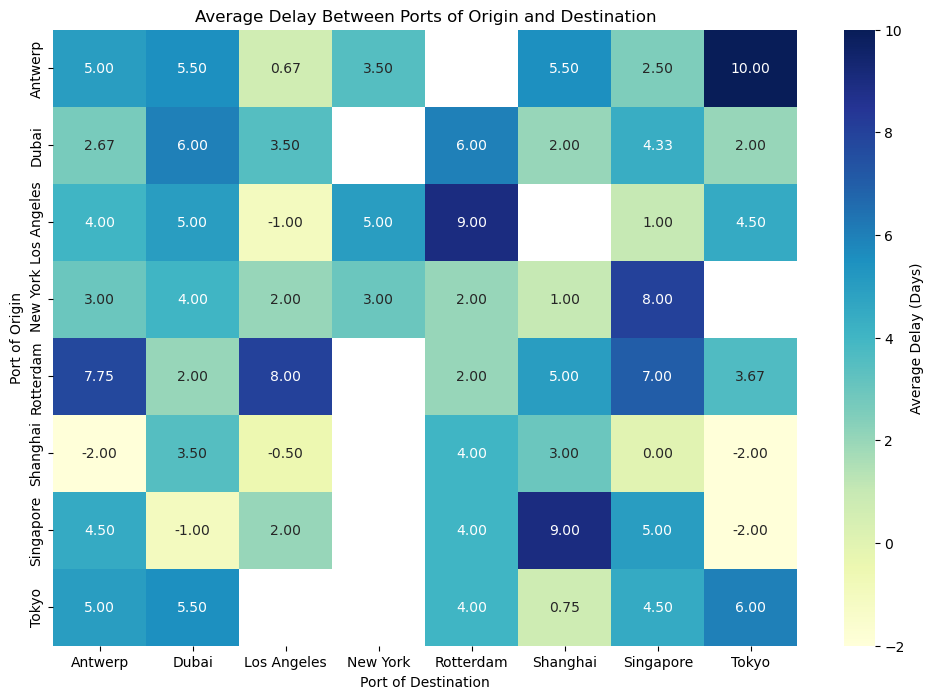

In [14]:
# Group by ports and calculate the average delay between ports
port_delay = df.groupby(['port_of_origin', 'port_of_destination'])['delay_days'].mean().unstack()

# Plotting port-to-port delay heatmap
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(port_delay, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Average Delay (Days)'})
plt.title("Average Delay Between Ports of Origin and Destination")
plt.xlabel("Port of Destination")
plt.ylabel("Port of Origin")
plt.show()

3. Shipping Company Performance: Comparing the average delay days for each shipping company. Some companies might have better operational efficiency than others. A bar chart shows which shipping companies have higher average delays. Companies with lower average delays are perfrming better in terms od timelines.

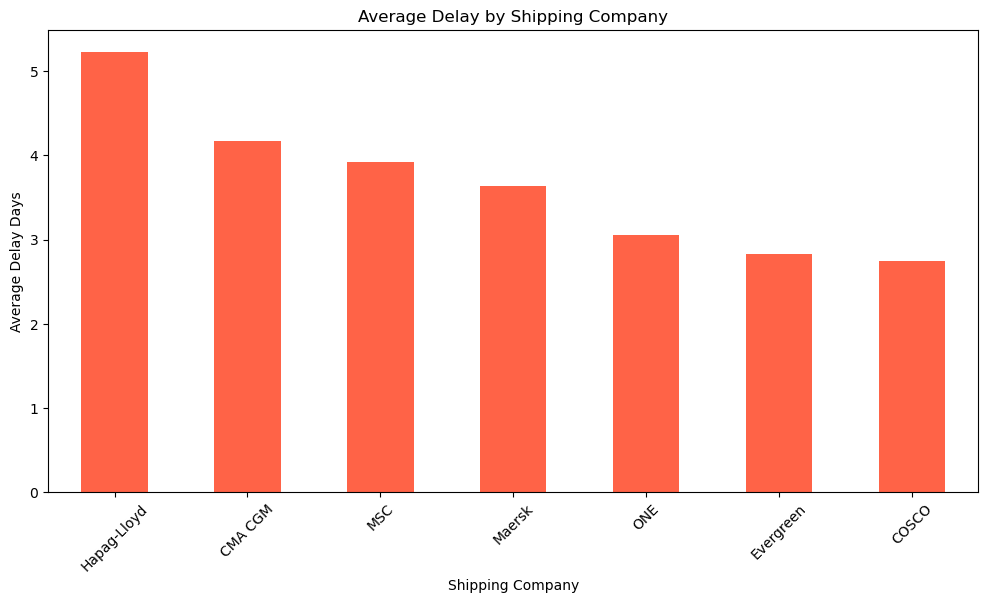

In [15]:
# Group by shipping company and calculate average delay days
company_delay = df.groupby('shipping_company')['delay_days'].mean().sort_values(ascending=False)

# Plotting shipping company performance
plt.figure(figsize=(12, 6))
company_delay.plot(kind='bar', color='tomato')
plt.title("Average Delay by Shipping Company")
plt.xlabel("Shipping Company")
plt.ylabel("Average Delay Days")
plt.xticks(rotation=45)
plt.show()


4. Cargo Type Analysis: Analysing the delays and tonnage for different Cargo types. Are heavier cargo types more prone to delays? ... The bar chart shows the total tonnage of each cargo type. The line graph overlays the average delay days, highlighting whether certain cargo are more likely to experience delays. Cargo types like liquid bulk or vehicles may be more prone to delays, potentially due to handling complexities. Additionally, heavier cargo may have a longer processing time, contributing to delays.

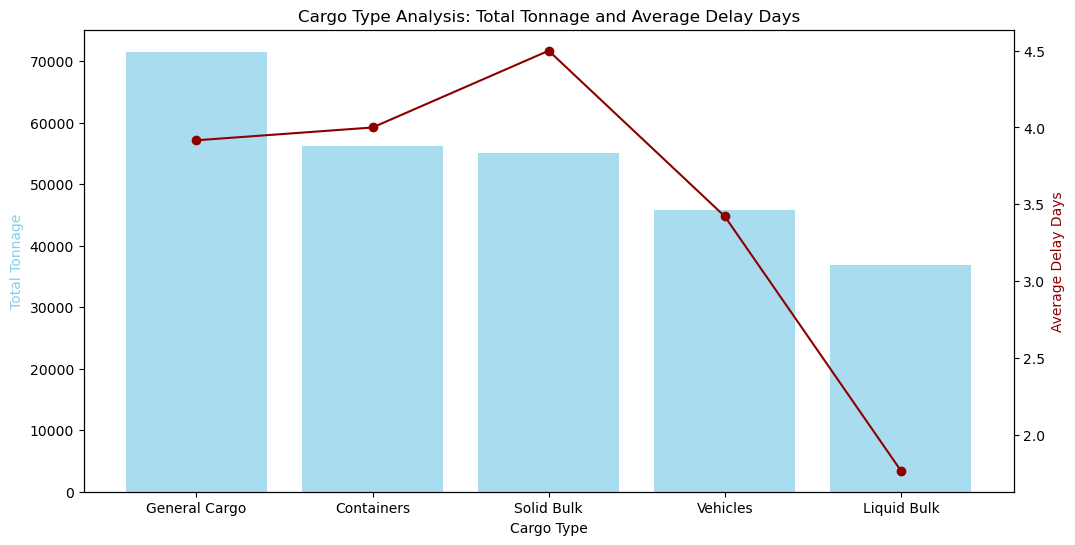

In [20]:
# Group by cargo type and calculate total tonnage and average delay
cargo_analysis = df.groupby('cargo_type').agg(
    total_tonnage=('tonnage', 'sum'),
    avg_delay_days=('delay_days', 'mean')
).sort_values(by='total_tonnage', ascending=False)

# Plot cargo type analysis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total tonnage per cargo type
ax1.bar(cargo_analysis.index, cargo_analysis['total_tonnage'], color='skyblue', alpha=0.7)
ax1.set_xlabel("Cargo Type")
ax1.set_ylabel("Total Tonnage", color='skyblue')

# Create a second y-axis to plot average delay days
ax2 = ax1.twinx()
ax2.plot(cargo_analysis.index, cargo_analysis['avg_delay_days'], color='darkred', marker='o', label="Avg Delay Days")
ax2.set_ylabel("Average Delay Days", color='darkred')

plt.title("Cargo Type Analysis: Total Tonnage and Average Delay Days")
plt.xticks(rotation=45)
plt.show()


5. Correlation Btw Tonnage and Delay Days: Examine if hevier shipments tend to be delayed more that lighter shipments. We will compute the correlation btw tonnage and delay_days. Correlation coefficient - tells whether there is a positive or negative relationship btw tonnage and delay_days. A value close to 1 indcates a strong positive correlation, meaning heavier shipments are more likely to be delayed. The scatetr plot visualizes this relationship, making it easier to spot any patterns. If the correlation is strong, heavier shipments might be delayed more often, possibly due to logistical challenges in handling large cargo. It’s important to address this to improve timeliness.

Correlation between Tonnage and Delay Days: 0.01


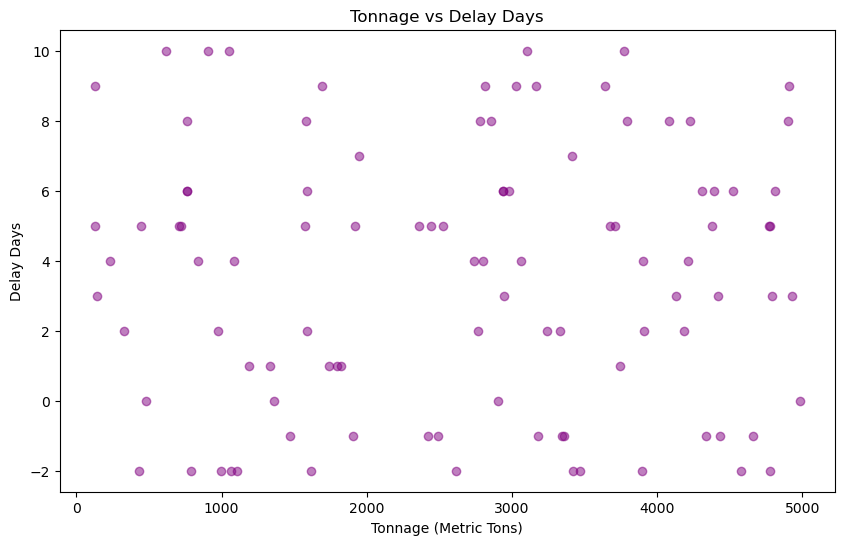

In [17]:
# Calculate correlation between tonnage and delay_days
correlation = df['tonnage'].corr(df['delay_days'])
print(f"Correlation between Tonnage and Delay Days: {correlation:.2f}")

# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['tonnage'], df['delay_days'], alpha=0.5, color='purple')
plt.title("Tonnage vs Delay Days")
plt.xlabel("Tonnage (Metric Tons)")
plt.ylabel("Delay Days")
plt.show()
